In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Exercise 04 : Histogram

In [6]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [ ]:
query = """
SELECT 
    CAST(strftime('%H', timestamp) AS INTEGER) as hour,
    CASE 
        WHEN strftime('%w', timestamp) IN ('0', '6') THEN 'weekend'
        ELSE 'working_day'
    END as day_type
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)
conn.close()

working_commits = df[df['day_type'] == 'working_day']['hour'].tolist()
weekend_commits = df[df['day_type'] == 'weekend']['hour'].tolist()

2037

1170

(0.0, 24.0)

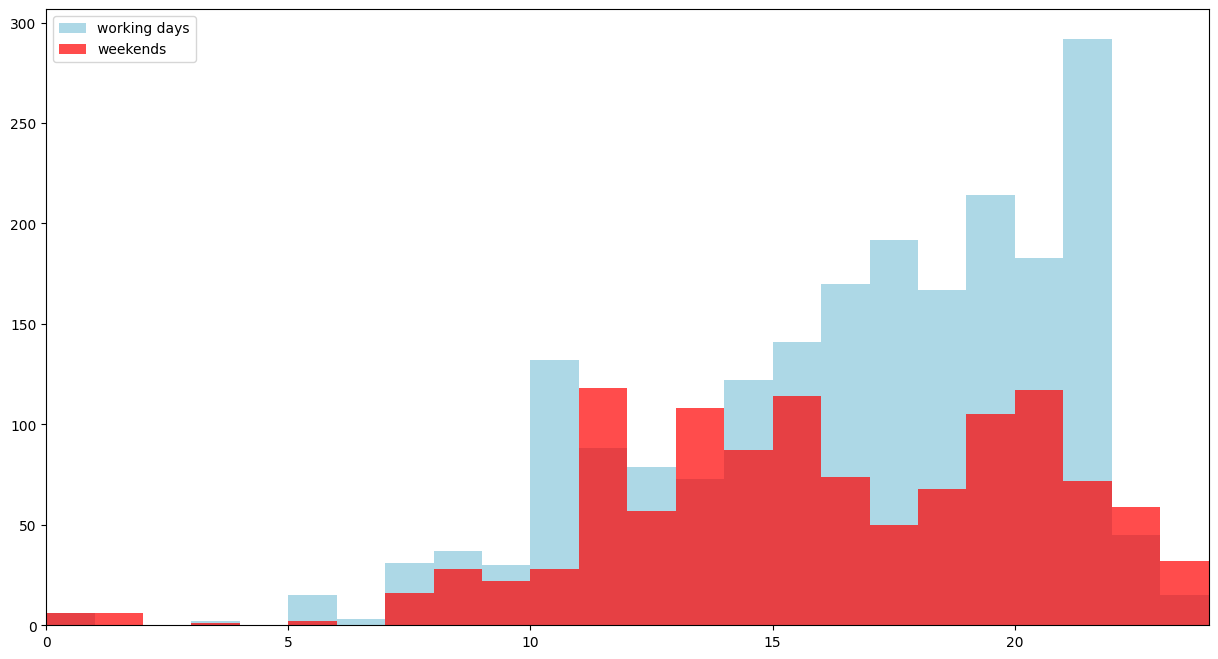

In [8]:

plt.figure(figsize=(15, 8))
plt.hist(working_commits, bins=24, alpha=1.0, range=(0, 24), label='working days', color='lightblue')
plt.hist(weekend_commits, bins=24, alpha=0.7, range=(0, 24), label='weekends', color='red')
plt.legend(loc='upper left')
plt.xlim(0, 24)

Are there hours when the total number of commits was higher on weekends than on working days? 11 13 22 23